<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/LegendrePolynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Lagrange Polynomial</h1></b>

Dr. Bingsen Wang

4/22/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
0


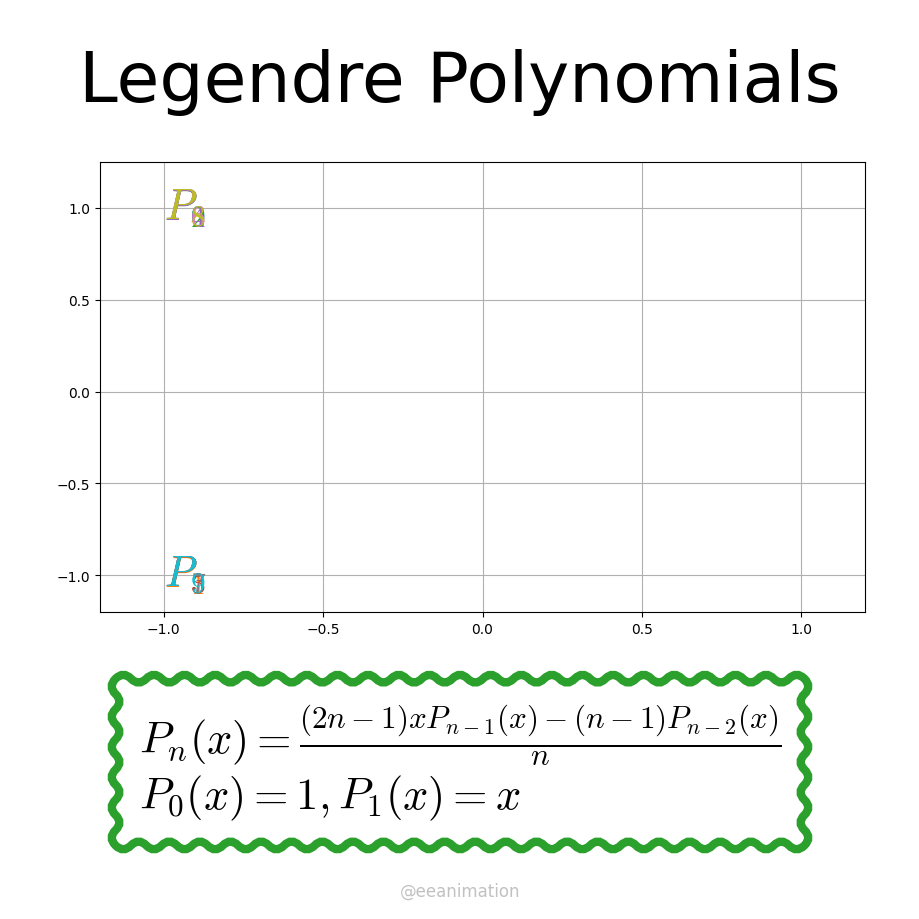

In [1]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def p(n,x):
  if n==0:  return 1+x*0
  elif n==1: return x
  else: return (x*(2*n-1)*p(n-1,x)-(n-1)*p(n-2,x))/n

Nf=480;x=np.linspace(-1,1,Nf);plst=[p(k,x) for k in range(10)]
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]);ax.axis('off')
ax1 = fig.add_axes([.1,.33,.85,.5],xlim=[-1.2,1.2],ylim=[-1.2,1.25],fc='none');ax1.grid('on')
ax.text(0,1,'Legendre Polynomials',size=50,ha='center')
ax.text(0,-.8,r'$P_{n}(x)=\frac{(2n-1)xP_{n-1}(x)-(n-1)P_{n-2}(x)}{n} $'+'\n'+r'$P_{0}(x)=1, P_{1}(x)=x$',
        size=32,ha='center',va='center',multialignment='left',
        bbox=dict(boxstyle='roundtooth',pad=.7,facecolor='none',edgecolor=cl[2],lw=6))
txts=[ax1.text(0,0,rf'$P_{k}$',size=30,c=cl[k],va='center') for k in range(10)]
lines=[ax1.plot([],[],c=cl[k],lw=3)[0] for k in range(10)]
def animate(i):
  if i%50==0: print(i)
  [lines[k].set_data(x[:i+1],plst[k][:i+1]) for k in range(10)]
  [txts[k].set_position((x[i],plst[k][i])) for k in range(10)]
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("Legendre.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)